# Building an SVM using scikit-learn - Lab

## Introduction

In the previous lab, you learned how to build an SVM from scratch. Here, you'll learn how to use scikit-learn to create SVMs!

## Objectives

In this lab you will: 

- Use scikit-learn to build an SVM when there are two groups 
- Use scikit-learn to build an SVM when there are more than two groups 

## Generate four datasets in scikit-learn

To start, here's some code using the scikit-learn dataset generator again: 

- The first dataset contains the same blobs as the first SVM in the last lab
- The second dataset contains the same blobs as the second SVM (Soft Margin classifier) in the last lab
- The third dataset contains four separate blobs
- The fourth dataset contains slightly different data with two classes, but using the `make_moons()` generator instead of blobs 

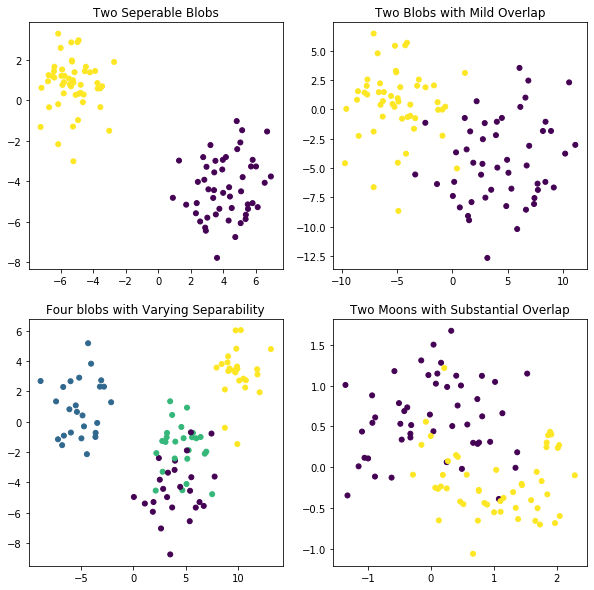

In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.title('Two Seperable Blobs')
X_1, y_1 = make_blobs(n_features=2, centers=2, cluster_std=1.25, random_state=123)
plt.scatter(X_1[:, 0], X_1[:, 1], c = y_1, s=25)

plt.subplot(222)
plt.title('Two Blobs with Mild Overlap')
X_2, y_2 = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3,  random_state=123)
plt.scatter(X_2[:, 0], X_2[:, 1], c = y_2, s=25)

plt.subplot(223)
plt.title('Four blobs with Varying Separability')
X_3, y_3 = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1.6,  random_state=123)
plt.scatter(X_3[:, 0], X_3[:, 1], c=y_3, s=25)

plt.subplot(224)
plt.title('Two Moons with Substantial Overlap')
X_4, y_4 = make_moons(n_samples=100, shuffle=False , noise=0.3, random_state=123)
plt.scatter(X_4[:, 0], X_4[:, 1], c=y_4, s=25)

plt.show()

## A model for a perfectly linearly separable dataset

Let's have a look at our first plot again:  

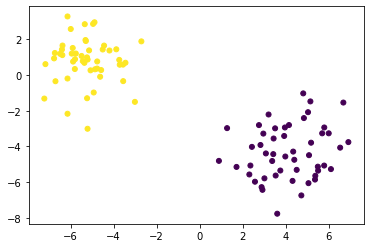

In [2]:
X_1, y_1 = make_blobs(n_features=2, centers=2, cluster_std=1.25, random_state=123)
plt.scatter(X_1[:, 0], X_1[:, 1], c=y_1, s=25);

Now it's time to fit a simple linear support vector machine model on this data. The process is very similar to other scikit-learn models you have built so far: import the class, instantiate, fit, and predict. 

- Import `SVC` from scikit-learn's `svm` module 
- Instantiate `SVC` (which stands for Support Vector Classification) with `kernel='linear'` as the only argument 
- Call the `.fit()` method with the data as the first argument and the labels as the second. 

> Note: Typically you should scale data when fitting an SVM model. This is because if some variables have a larger scale than others, they will dominate variables that are on a smaller scale. To read more about this, check out page 3 of [this paper](https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf). Because these variables are all on a similar scale, we will not apply standardization. However, when performing SVM on a real-world dataset, you should ALWAYS scale the data before fitting a model. 

In [3]:
# Your code here
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X_1, y_1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Print the coefficients of the model: 

In [4]:
# Print the coefficients
clf.coef_

array([[-0.4171222 ,  0.14320341]])

Save the first feature (on the horizontal axis) as `X_11` and the second feature (on the vertical axis) as `X_12`. 

In [5]:
X_11 = X_1[:, 0]
X_12 = X_1[:, 1]

When we create plots for the classifier later, we're going to want appropriate scales for the axes. In order to do this, we should see what the minimum and maximum values are for the horizontal and vertical axes. To make the plots not feel cramped, we will subtract the minimum by 1 and add 1 to the maximum. Save these values as `X11_min`, `X11_max`, `X12_min`, and `X12_max`. 

In [6]:
# Limits for the axes
X11_min, X11_max = X_11.min()-1, X_11.max()+1
X12_min, X12_max = X_12.min()-1, X_12.max()+1

Next, use NumPy's `linspace()` function to generate evenly spaced points between these adjusted min and max values for both `X_11` and `X_12`. Generating 10 points along each is sufficient. 

In [7]:
# Your code here
x11_coord = np.linspace(X11_min, X11_max, 10)
x12_coord = np.linspace(X12_min, X12_max, 10)

Now you'll create an entire grid of points by combining these two arrays using NumPy's `meshgrid()` function. It's a straightforward function, but feel free to pull up the documentation if you haven't worked with it before.

In [8]:
# Your code here
X12_C, X11_C = np.meshgrid(x12_coord, x11_coord)

Finally, you need to reshape the outputs from `meshgrid()` to create a numpy array of the shape (100, 2) that concatenates the coordinates for `X11` and `X12` together in one numpy object. Use `np.c_` and make sure to use `.ravel()` first. Use `np.shape()` on your resulting object first to verify the resulting shape. 

In [9]:
# Your code here
x11x12 = np.c_[X11_C.ravel(), X12_C.ravel()]

# Check the shape
x11x12.shape

(100, 2)

Great! Now we want to get a decision boundary for this particular dataset. Call `clf.decision_function()` on `x11x12`. It will return the distance to the samples that you generated using `np.meshgrid()`. You need to then change the result's shape in a way that you get a (10,10) numpy array. *We need to reshape this numpy array because it must be a 2-dimensional shape to function with the `contour()` method you will use in the next plot.*

In [10]:
# Your code here
print(X11_C.shape)
print(X12_C.shape)

(10, 10)
(10, 10)


In [11]:
f_d = clf.decision_function(x11x12).reshape(X11_C.shape)
f_d.shape

(10, 10)

Now, let's plot our data again with the result of SVM in it. This is what the following code does, all you need to do is run it. 

- The first line is simply creating the scatter plot like before
- Next, we specify that what we'll do next uses the same axes as the scatter plot. We can do this using `plt.gca()`. Store it in an object and we'll use this object to create the lines in the plot 
- Then we use `.countour()`. The first two arguments are the coordinates created using the meshgrid, the third argument is the result of your decision function call  
- We'll want three lines: one decision boundary line and the two lines going through the support vectors. We include `levels = [-1,0,1]` to get all three 

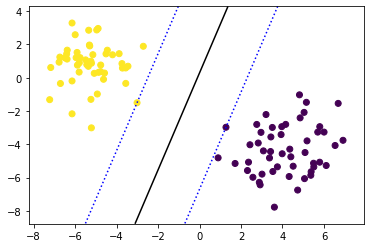

In [12]:
plt.scatter(X_11, X_12, c=y_1)
axes = plt.gca()
axes.contour(X11_C, X12_C, f_d, colors=['blue', 'black', 'blue'], 
             levels=[-1, 0, 1], linestyles=[':', '-', ':'])
plt.show()

The coordinates of the support vectors can be found in the `.support_vectors_` attribute. Have a look:

In [13]:
# Your code here
clf.support_vectors_

array([[ 1.27550827, -2.97755444],
       [-3.01370675, -1.50501182]])

Now we can recreate your plot and highlight the support vectors:  

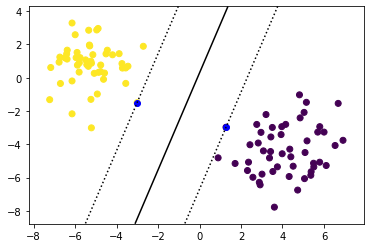

In [14]:
plt.scatter(X_11, X_12, c=y_1)
axes = plt.gca()
axes.contour(X11_C, X12_C, f_d, colors='black', levels=[-1, 0, 1], linestyles=[':', '-', ':'])
axes.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='blue') 
plt.show()

## When the data is not linearly separable

The previous example was pretty easy. The two "clusters" were easily separable by one straight line classifying every single instance correctly. But what if this isn't the case? Let's look at the second dataset again: 

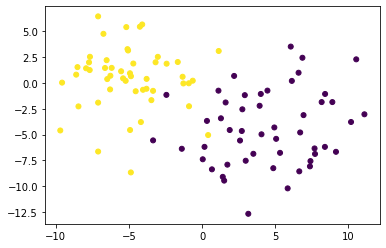

In [15]:
X_2, y_2 = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3,  random_state=123)
plt.scatter(X_2[:, 0], X_2[:, 1], c=y_2, s=25);

Scikit-learn's `SVC` class you used above automatically allows for slack variables. As such, simply repeat the code to fit the SVM model and plot the decision boundary.

In [16]:
# Your code here
def solve_2d_qp(X, y, C=1):
    X_1 = X[:,0]
    X_2 = X[:,1]
    X1_min, X1_max = X_1.min()-1, X_1.max()+1
    X2_min, X2_max = X_2.min()-1, X_2.max()+1
    x1_coord = np.linspace(X1_min, X1_max, 10)
    x2_coord = np.linspace(X2_min, X2_max, 10)
    X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)
    x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]
    
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)
    f_d = clf.decision_function(x1x2).reshape(X1_C.shape)

    plt.scatter(X_1, X_2, c=y)
    axes = plt.gca()
    axes.contour(X1_C, X2_C, f_d, colors='black', levels=[-1, 0, 1], linestyles=[':', '-', ':'])
    # axes.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='blue') 
    plt.show()

    return (clf, f_d)

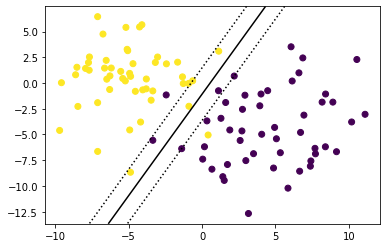

In [17]:
solve_2d_qp(X_2, y_2);

As you can see, three instances are misclassified (1 yellow, 2 purple). It may not be possible to improve this, but it's worth experimenting with by changing your hyperparameter `C`, which can be done when initializing the classifier. Try it out now; re-instantiate a model object, adding a high value for the argument `C`. Specifically, set C = 5,000,000. Then refit the classifier and draw the updated decision boundary.

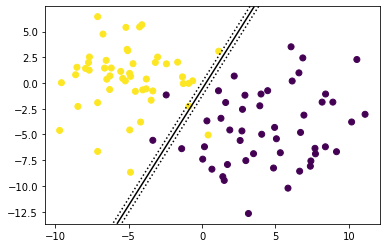

In [18]:
# Your code here
solve_2d_qp(X_2, y_2, C=5000000);

## Other options in scikit-learn

If you dig deeper into scikit-learn, you'll notice that there are several ways to create linear SVMs for classification:

- `SVC(kernel = "linear")` , what you've used above. Documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)  
- `svm.LinearSVC()`, which is very similar to the simple SVC method, but:
    - Does not allow for the keyword "kernel", as it is assumed to be linear (more on non-linear kernels later)
    - In the objective function, `LinearSVC` minimizes the squared hinge loss while `SVC` minimizes the regular hinge loss 
    - `LinearSVC` uses the one-vs-all (also known as one-vs-rest) multiclass reduction while `SVC` uses the one-vs-one multiclass reduction (this is important only when having > 2 classes!)
- `svm.NuSVC()`, which is again very similar,
    - Does have a "kernel" argument
    - `SVC` and `NuSVC` are essentially the same thing, except that for `NuSVC`, `C` is reparametrized into `nu`. The advantage of this is that where `C` has no bounds and can be any positive number, `nu` always lies between 0 and 1  
    - One-vs-one multiclass approach 
    
    
So what does one-vs-one mean? What does one-vs-all mean? 

- One-vs-one means that with $n$ classes, $\dfrac{(n)*(n-1)}{2}$ boundaries are constructed! 
- One-vs-all means that when there are $n$ classes, $n$ boundaries are created.

The difference between these three types of classifiers is mostly small but generally visible for datasets with 3+ classes. Have a look at our third example and see how the results differ!

## Classifying four classes

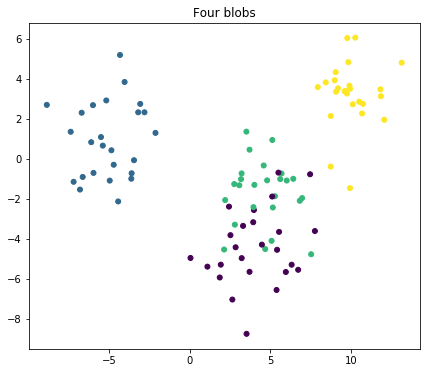

In [19]:
plt.figure(figsize=(7, 6))

plt.title('Four blobs')
X, y = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1.6,  random_state = 123)
plt.scatter(X[:, 0], X[:, 1], c = y, s=25);

Try four different models and plot the results using subplots where:

    - The first one is a regular SVC (C=1)
    - The second one is a regular SVC with C=0.1
    - The third one is a NuSVC with nu= 0.7
    - The fourth one is a LinearSVC (no arguments)
    
Make sure all these plots have highlighted support vectors, except for LinearSVC (this algorithm doesn't have the attribute `.support_vectors_`).   
Additionally, be sure to use `contourf()`, instead of `contour()` to get filled contour plots.

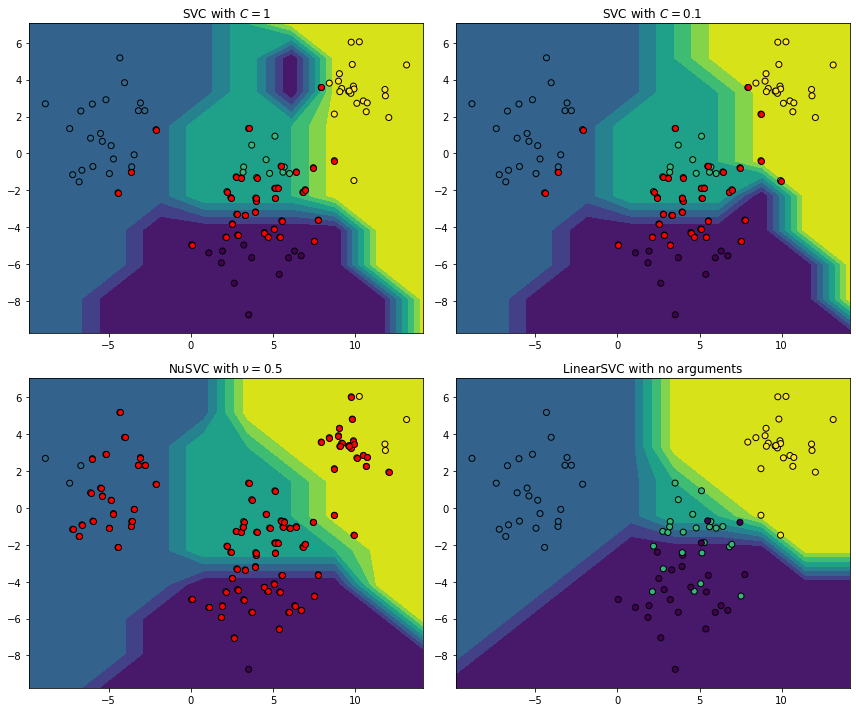

In [20]:
# Your code here
from sklearn import svm

X_1 = X[:,0]
X_2 = X[:,1]
X1_min, X1_max = X_1.min()-1, X_1.max()+1
X2_min, X2_max = X_2.min()-1, X_2.max()+1
x1_coord = np.linspace(X1_min, X1_max, 10)
x2_coord = np.linspace(X2_min, X2_max, 10)
X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)
x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]


# plots
fig = plt.figure(figsize=(12,10))

# regular SVC (C=1)
clf_1 = SVC(kernel='linear', C=1)
clf_1.fit(X, y)
pred_1 = clf_1.predict(x1x2).reshape(X1_C.shape)
plt.subplot(2, 2, 1)
plt.title('SVC with $C=1$')
axes = plt.gca()
axes.contourf(X1_C, X2_C, pred_1, alpha=1)
plt.scatter(X_1, X_2, c=y, edgecolors='k')
axes.scatter(clf_1.support_vectors_[:, 0], clf_1.support_vectors_[:, 1], facecolors='red', edgecolors='k') 

# regular SVC with C=0.1
clf_2 = SVC(kernel='linear', C=0.1)
clf_2.fit(X, y)
pred_2 = clf_2.predict(x1x2).reshape(X1_C.shape)
plt.subplot(2, 2, 2)
plt.title('SVC with $C=0.1$')
axes = plt.gca()
axes.contourf(X1_C, X2_C, pred_2, alpha=1)
plt.scatter(X_1, X_2, c=y, edgecolors='k')
axes.scatter(clf_2.support_vectors_[:, 0], clf_2.support_vectors_[:, 1], facecolors='red', edgecolors='k') 

# NuSVC with nu= 0.7
clf_3 = svm.NuSVC(kernel='linear', nu=0.7)
clf_3.fit(X, y)
pred_3 = clf_3.predict(x1x2).reshape(X1_C.shape)
plt.subplot(2, 2, 3)
plt.title('NuSVC with $\\nu=0.5$')
axes = plt.gca()
axes.contourf(X1_C, X2_C, pred_3, alpha=1)
plt.scatter(X_1, X_2, c=y, edgecolors='k')
axes.scatter(clf_3.support_vectors_[:, 0], clf_3.support_vectors_[:, 1], facecolors='red', edgecolors='k') 

# LinearSVC (no arguments)
clf_4 = svm.LinearSVC()
clf_4.fit(X, y)
pred_4 = clf_4.predict(x1x2).reshape(X1_C.shape)
plt.subplot(2, 2, 4)
plt.title('LinearSVC with no arguments')
axes = plt.gca()
axes.contourf(X1_C, X2_C, pred_4, alpha=1)
plt.scatter(X_1, X_2, c=y, edgecolors='k')

fig.tight_layout()
plt.show()

Now, look at the coefficients of the decision boundaries. Remember that a simple `SVC` uses a one-vs-one method, this means that for four classes, $\dfrac{(4 * 3)}{2}= 6$ decision boundaries are created. The coefficients can be accessed in the attribute `.coef_`. Compare these with the coefficients for the LinearSVC. What do you notice?

In [21]:
# Your code here
print(f"regular SVC (C=1) coef:\n{clf_1.coef_}\n")
print(f"regular SVC with C=0.1:\n{clf_2.coef_}\n")
print(f"NuSVC with nu= 0.7 coef:\n{clf_3.coef_}\n")
print(f"LinearSVC (no arguments) coef:\n{clf_4.coef_}\n")

regular SVC (C=1) coef:
[[ 0.30750887 -0.22003386]
 [-0.02038661 -0.62514422]
 [-1.27858472 -0.38366296]
 [-0.35649837  0.13697254]
 [-0.19009595 -0.03838317]
 [-0.7500211  -0.42482559]]

regular SVC with C=0.1:
[[ 0.30750887 -0.22003386]
 [-0.00165148 -0.54016115]
 [-0.37433577 -0.27813528]
 [-0.35649837  0.13697254]
 [-0.19009595 -0.03838317]
 [-0.55475847 -0.24295554]]

NuSVC with nu= 0.7 coef:
[[ 0.13841951 -0.07650691]
 [-0.03468906 -0.43771003]
 [-0.10956511 -0.14710075]
 [-0.16351047  0.04541982]
 [-0.11832768 -0.01710424]
 [-0.17670688 -0.15848248]]

LinearSVC (no arguments) coef:
[[ 0.02232847 -0.33705978]
 [-0.34583119  0.19128273]
 [ 0.01936329 -0.05834845]
 [ 0.26176386  0.27932929]]



In [22]:
# LinearSVC has fewer coeff than the other models

## Non-linear boundaries

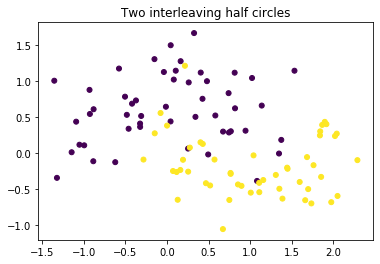

In [23]:
plt.title('Two interleaving half circles')
X_4, y_4 = make_moons(n_samples=100, shuffle = False , noise = 0.3, random_state=123)
plt.scatter(X_4[:, 0], X_4[:, 1], c = y_4, s=25)

plt.show()

Finally, look at the fourth plot. While you can try and draw a line to separate the classes, it's fairly apparent that a linear boundary is not appropriate. In the next section, you'll learn about SVMs with non-linear boundaries!

## Additional reading

It is highly recommended to read up on SVMs in the scikit-learn documentation!
- https://scikit-learn.org/stable/modules/svm.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html

## Summary

In this lesson, you explored and practiced how to use scikit-learn to build linear support vector machines. In the next lesson, you'll learn how SVMs can be extended to have non-linear boundaries.